# **Stage 1 - Hexa Avengers (E-Commerce Shipping Data)**

# **Info Dataset**

Dataset yang digunakan merupakan dataset [E-Commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics) yang diambil dari kaggle yang terdiri dari 10999 baris dan 12 kolom. Kolom pada dataset ini terdiri dari:
- **ID**: ID Number of Customers.
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product**: Cost of the Product in US Dollars.
- **Prior purchases**: The Number of Prior Purchase.
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
- **Gender**: Male and Female.
- **Discount offered**: Discount offered on that specific product.
- **Weight in gms**: It is the weight in grams.
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# **Info Bisnis**

## a. Problem

<div style="text-align: justify">
<p>
PT. Avengers adalah sebuah perusahaan yang bergerak dalam bidang e-commerce. Didirikan tahun 2022 dan kini memiliki 10.999 transaksi yang tercatat dalam database. Pimpinan hendak mengevaluasi terkait kinerja divisi shipping terkait temuan bahwa  sebanyak 6.563 (59.7%) dari total transaksi mengalami keterlambatan pengiriman yang diduga mempengaruhi penilaian customer terhadap kinerja perusahaan.
</p>
<p>
Tim bisnis menugaskan tim data untuk melakukan analisis terhadap data yang disediakan perusahaan untuk mengidentifikasi penyebab keterlambatan pengiriman sehingga dapat memberi rekomendasi terkait penyelesaian problem not on time rate yang tinggi.
</p>
</div>


## b. Peran

Sebagai Tim Data yang terdiri dari\
Project Leader: Kevin Usmayadhy Wijaya\
Data Analyst: Vicky Clarissa Jennie Damara\
Data Scientist : Nabil Abduh Aqil\
Machine Learning Engineer: Febiya Jomy Pratiwi\
Business Analyst: Qistina Muharrifa & Riel Jeremy Jordan Umboh

## c. Goal

Goal yang ingin dicapai adalah Menurunkan persentase keterlambatan barang


## d. Objective

- Membuat model klasifikasi yang bisa memprediksi keterlambatan barang sehingga perusahaan dapat memberikan notifikasi keterlambatan kepada customer
- Mengetahui faktor-faktor yang mempengaruhi keterlambatan


## e. Business Metrics


Not on-time Rate (Persentase produk yang tidak tepat waktu)


# **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import PercentFormatter

In [ ]:
sns.set_style("whitegrid")

# **Load Dataset**

In [ ]:
sheet_id = '1P5-8XwOXjr_zSiJ-U5W1VhqHIHKqUjUe2CwW_Rd9iCQ'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv'
df = pd.read_csv(url)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# **EDA, Insights & Visualization**

## **1. Descriptive Statistics**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- Semua colomn sudah terisi sehingga tidak perlu dilakukan handling missing value
- Jika dilihat dari columnnya semua sudah memiliki tipe yang sesuai. Nama colomn **Reach.on.Time_Y.N** diubah agar tidak membingungkan menjadi **Is_Late** karena value 1 merepresentasikan produk terlambat (tidak on time) dan 0 merepresentasikan produk tidak terlambat (on time) sehingga kurang sesuai dengan nama colomn Reach.on.Time_Y.N.



In [ ]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].apply(bool)
df.rename(columns = {'Reached.on.Time_Y.N':'Is_Late'}, inplace = True)

In [ ]:
category = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Is_Late']
number = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

In [ ]:
df[category].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Is_Late
count,10999,10999,10999,10999,10999
unique,5,3,3,2,2
top,F,Ship,low,F,True
freq,3666,7462,5297,5545,6563


Berdasarkan unique values, semua variabel sesuai nilainya pada deskripsi dataset, tidak ada kesalahan input.  Berdasarkan frequencies dan top frequent dapat terlihat bahwa:
- Pengiriman cenderung terlambat **(Is_Late)** sebanyak **6563**.
- Penyimpanan dominan pada **Warehouse_Block F** sebanyak **3866**.
- **Product_Importance** dengan kategori **Low** sebanyak **5297**,
- Pengiriman **Gender** paling dominan adalah **F (Female)** sebanyak **5545**.
- Barang dikirim menggunakan **Mode of Shipment** terbesar yaitu **Ship** sebanyak 7462, Hal ini menandakan adanya ketimpangan kelas yang besar dibandingkan jenis pengiriman lainnya.


In [ ]:
df[number].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


- **Customer_care_calls** : customer **minimal** melakukan telepon sebanyak *2 kali *dengan rata-rata (**mean**) *4 kali*  dan **maksimal** **7 kali**
- **Customer_rating**: : customer memberikan **minimal rating 1** dengan **rata-rata (mean) nilai 3** dan **maksimal rating 5**
- **Cost_of_the_product** : customer membeli barang dengan harga **minimal 96 USD** dengan **rata-rata (mean) harga 210 USD** dan **maksimal harga 310 USD**.
- **Prior Purchase** : customer melakukan pembelian **minimal** sebanyak **2 kali** dengan **rata-rata pembelian (mean) 3.6 kali** dan **maksimal 10 kali**,
- **Discount offered** : customer **minimal** mendapatkan **1% diskon** dengan **rata-rata (mean)** **13,37%**, dengan diskon maksimal **65%**.
- **Weights in gms** : Berat barang yang dipesan customer **minimal 1001 gram** dengan **rata-rata (mean) 3634 gram** dan maksimal **berat barang sebesar 7846 gram**.


## **2. Univariate Analysis**

In [ ]:
sns.set_palette("Set2")
colorArr = sns.color_palette("Set2")

### a. Data Numerik

Untuk melihat univariate analysis dari data numerik, kami menggunakan **violin plot** untuk mengecek persebaran datanya

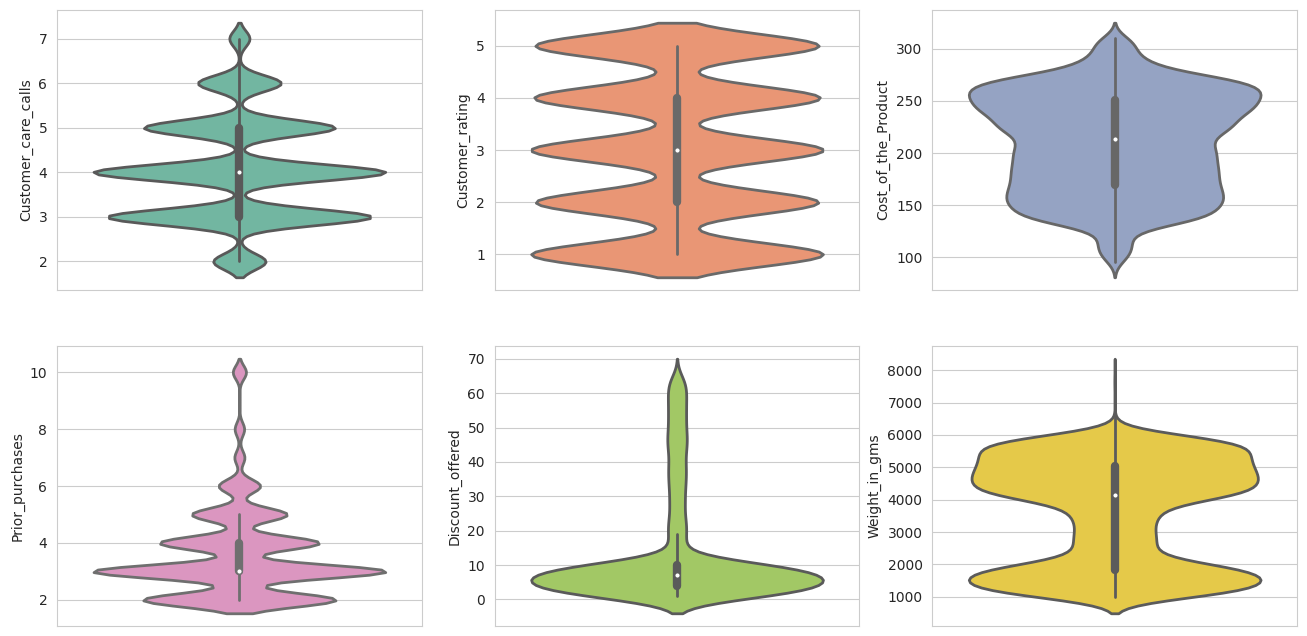

In [ ]:
plt.figure(figsize=(16, 8))
for i in range (0, len(number)):
  plt.subplot(math.ceil(len(number)/3), 3, i+1)
  sns.violinplot(data=df, y=number[i], linewidth=2, orient='v', color = colorArr[i])

Selain itu juga kami mengecek persebaran data yang dipisah berdasarkan colomn targetnya untuk melihat perbedaan persebaran data antara kelas yang on time dengan yang tidak ontime.

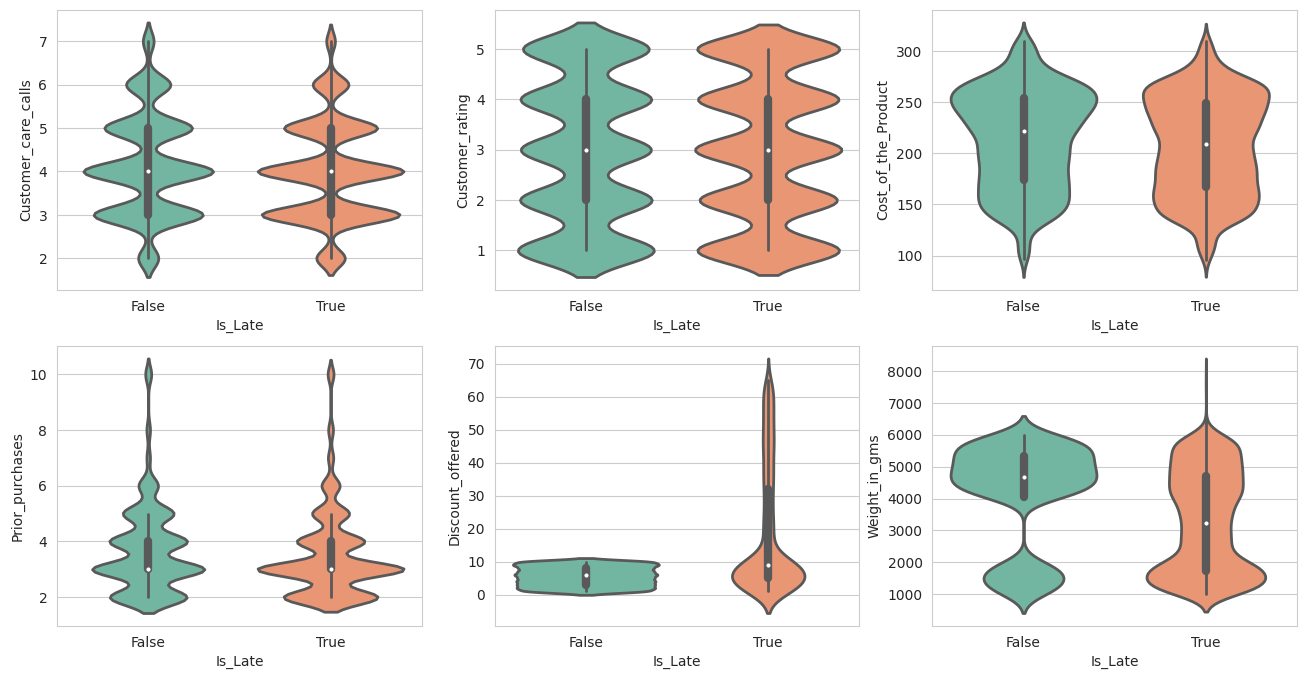

In [ ]:
plt.figure(figsize=(16, 8))
for i in range (0, len(number)):
  plt.subplot(math.ceil(len(number)/3), 3, i+1)
  sns.violinplot(data=df, y=number[i], x='Is_Late', linewidth=2)

Berdasarkan hasil dari violin plot sebelumnya, dapat ditarik beberapa kesimpulan diantaranya:
- Column Prior_purchases dan Discount_offered secara keseluruhan terdapat nilai outlier yang tidak normal sehingga perlu dilakukan penanganan khusus (bisa didrop atau direplace).
- Setelah dipisah berdasarkan targetnya, column Discount_offered dan Weight_in_gms memiliki perbedaan persebaran data yang cukup signifikan pada produk yang on-time dan yang tidak on-time. Oleh karena itu, column ini bisa kita tandai sebagai column yang berkemungkinan berpengaruh terhadap ketepatan produk yang dikirim.
- Selain column diatas, persebarannya normal.
- Produk seberat 1000-2000 gram paling banyak. Produk dengan berat 2000-4000 gms cenderung sedikit.




### b. Data Categorical

Untuk melihat univariate analysis dari data categorical, kami menggunakan **Count Plot** untuk mengecek persebaran datanya

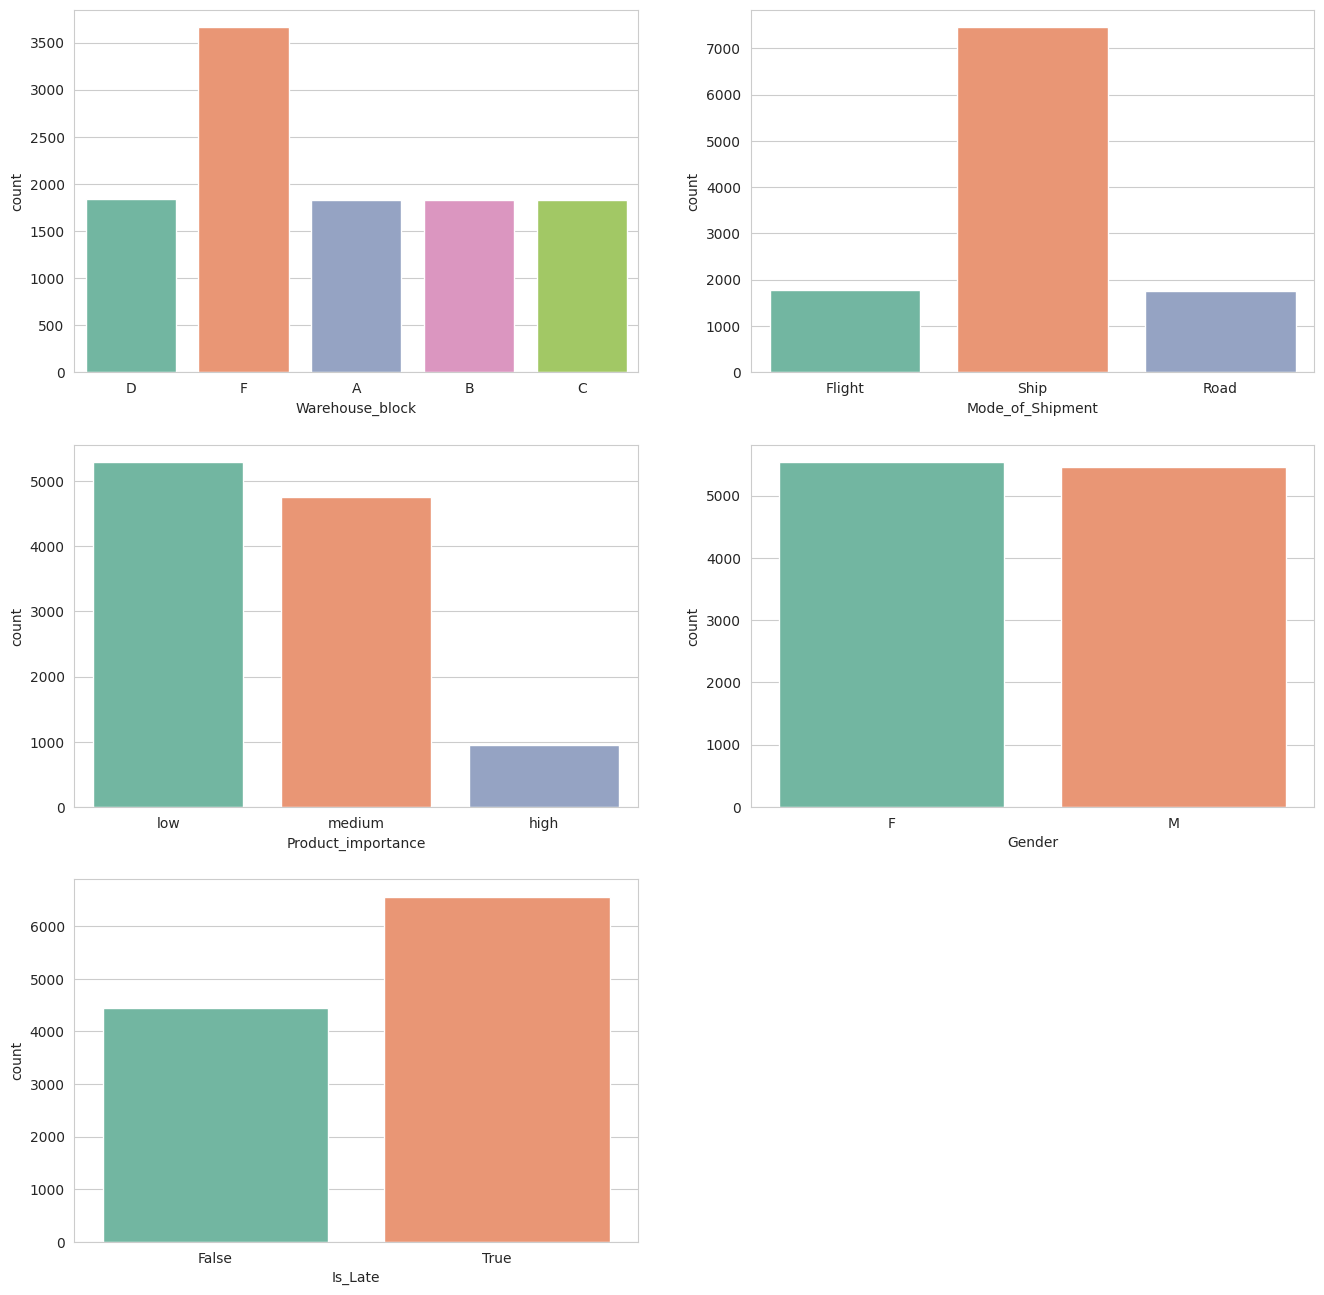

In [ ]:
plt.figure(figsize=(16, 16))
for i in range (0, len(category)):
  plt.subplot(math.ceil(len(category)/2), 2, i+1)
  sns.countplot(data=df, x=category[i])

In [ ]:
category.remove('Is_Late')
category

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

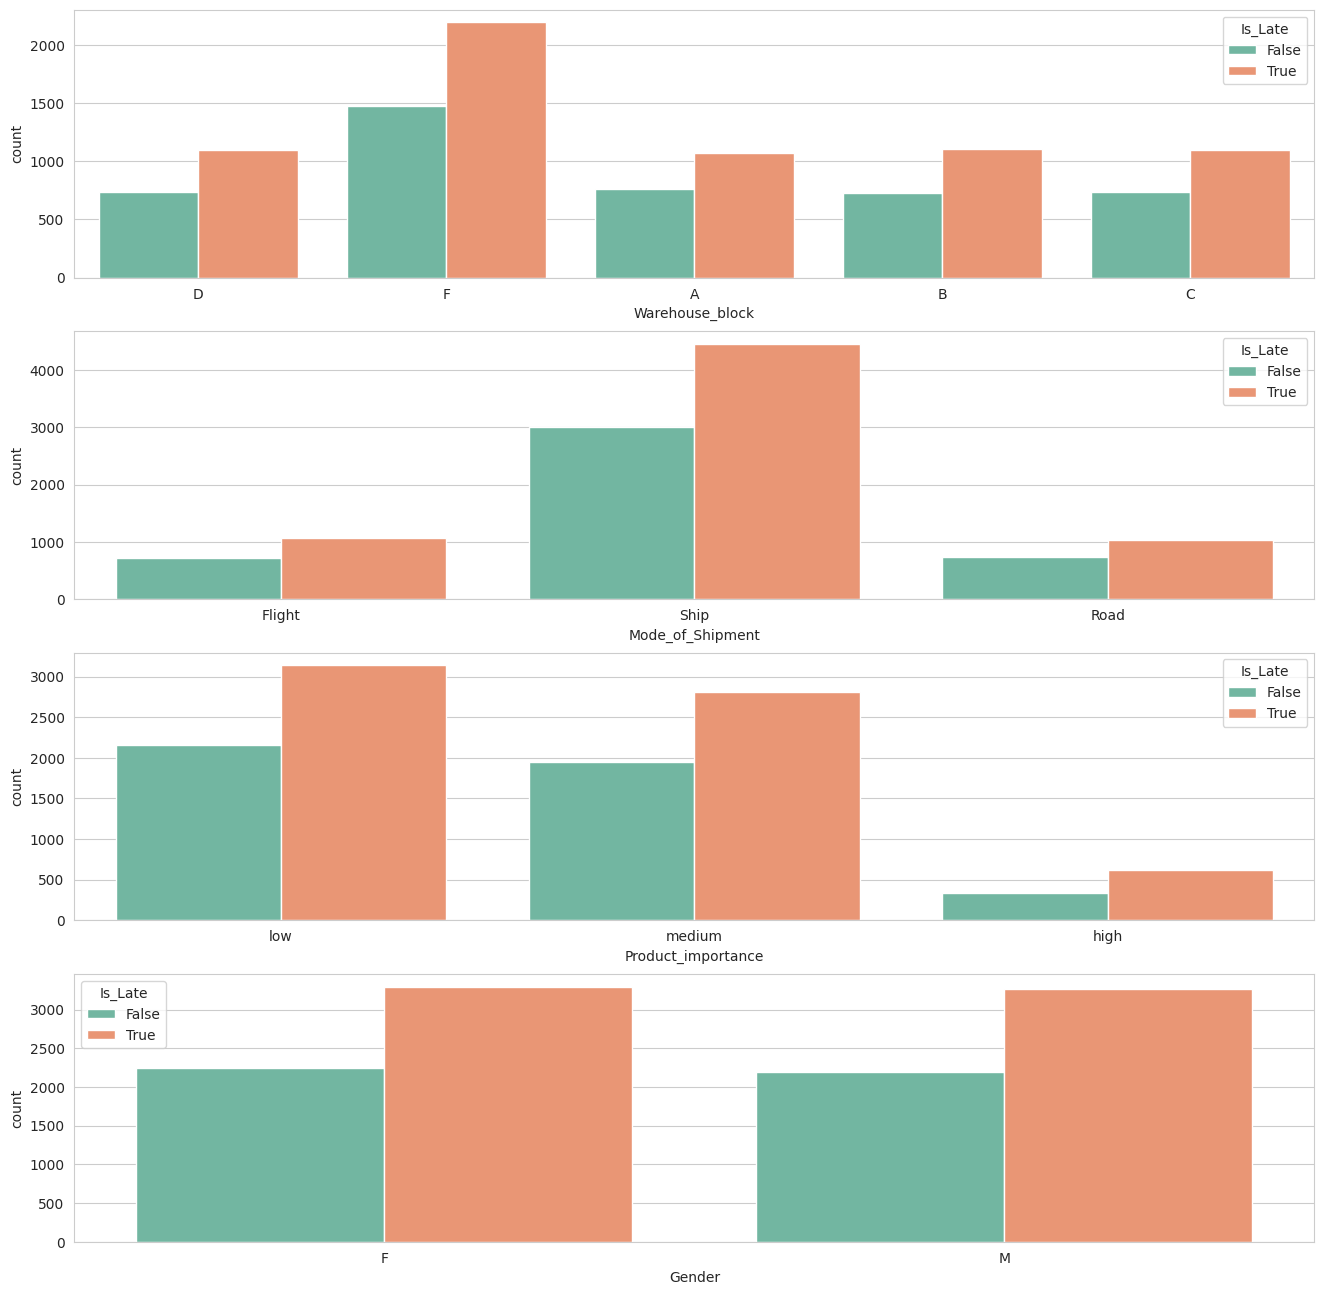

In [ ]:
plt.figure(figsize=(16, 16))
for i in range (0, len(category)):
  plt.subplot(math.ceil(len(category)/1), 1, i+1)
  sns.countplot(data=df, x=category[i], hue='Is_Late')

Berdasarkan hasil dari countplot diatas, dapat ditarik beberapa kesimpulan diantaranya:
1. Sebelum Dipisah
- Persebaran pada column **Warehouse_block** terdapat 1 block yang memiliki **jumlah yang jauh lebih banyak** dengan block lainnya, yaitu **block F**.
- Pada column **Mode_of_Shipment** terdapat 1 mode yang memiliki **jumlah jauh lebih banyak** dibandingkan dengan mode lainnya yaitu mode pengiriman menggunakan **Ship**.
- Pada column **Product_importance** terdapat 1 kategori importance yang memiliki **jumlah jauh lebih sedikit** dibandingkan dengan kategori lainnya yaitu kategori **High**.
- Pada column **Gender tidak ada perbandingan yang signifikan**.
- Pada column **Is_Late**, perbandingan data yang **late:ontime** sekitar sebesar **3:2**
2. Setelah Dipisah
- Persebaran data pada column yang dipisah berdasarkan column targetnya, **tidak ada perbedaan yang signifikan antara target disetiap kategorinya**

## **3. Multivariate Analysis**

### a. Data Numerik

In [ ]:
number.append('Is_Late')
number

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Is_Late']

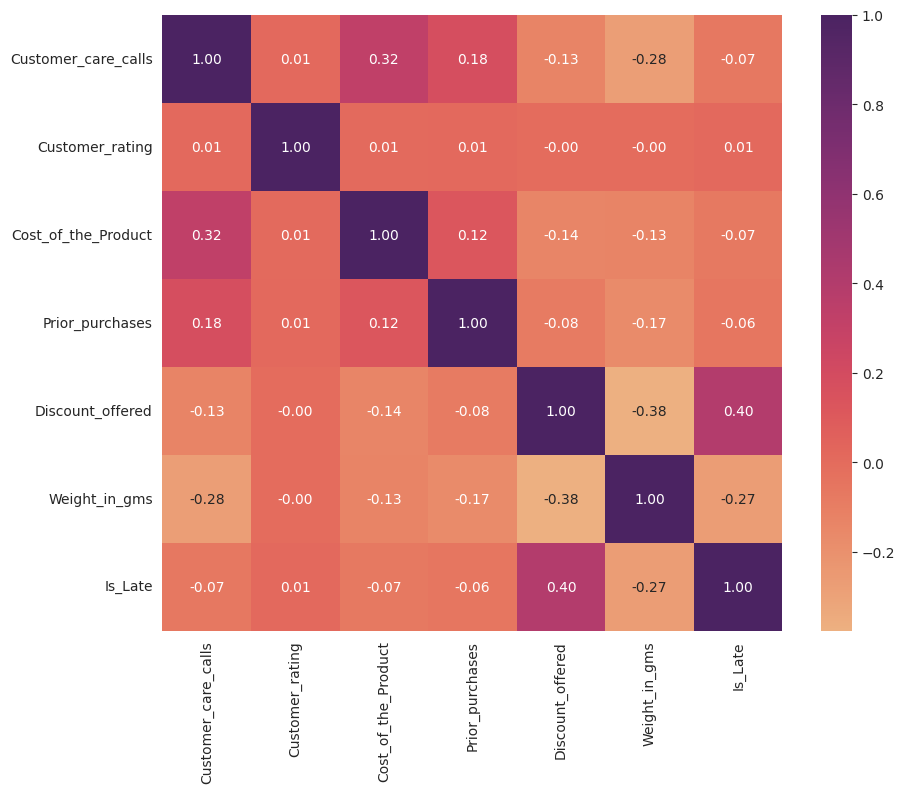

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[number].corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

Berdasarkan matrix korelasi dapat disimpulkan bahwa:

**Positif Correlation**
- Adanya korelasi positif antara discount offered dengan Is_Not_Ontime sebesar 40%. Tingginya discount yang ditawarkan menyebabkan banyaknya barang yang mengalami keterlambatan.
- Adanya korelasi positif antara customer care calls dengan cost product sebanyak 32%.  Hal ini menyebabkan semakin tinggi cost product, maka ada kecenderungan semakin tinggi customer care calls.
- Adanya korelasi positif antara customer care calls dengan prior purchase sebanyak 18%. Customer care calls tertinggi ada pada prior purchase 3.

**Negatif Correlation**
- Adanya korelasi negatif antara discount offer dan weight in gms sebesar -38%. Adanya kecenderungan bahwa kecilnya berat barang menyebabkan barang mendapatkan diskon yang besar.
- Adanya korelasi negatif antara customer care calls dengan weight in gms sebesar -28%. Adanya kecenderungan bahwa semakin kecil berat barang, maka semakin tinggi customer care calls nya.
- Adanya korelasi negatif antara customer care calls dengan discount offered sebesar -13%. Adanya kecenderungan bahwa semakin kecil diskon yang ditawarkan, maka akan semakin tinggi customer care calls nya.


Sehingga Korelasi tertinggi antara target (Is_late) dengan column fiturnya adalah column Discount_offered yaitu sebesar 0.40, lalu diikuti dengan column Weight_in_gms sebesar -0.27.



<Figure size 1000x800 with 0 Axes>

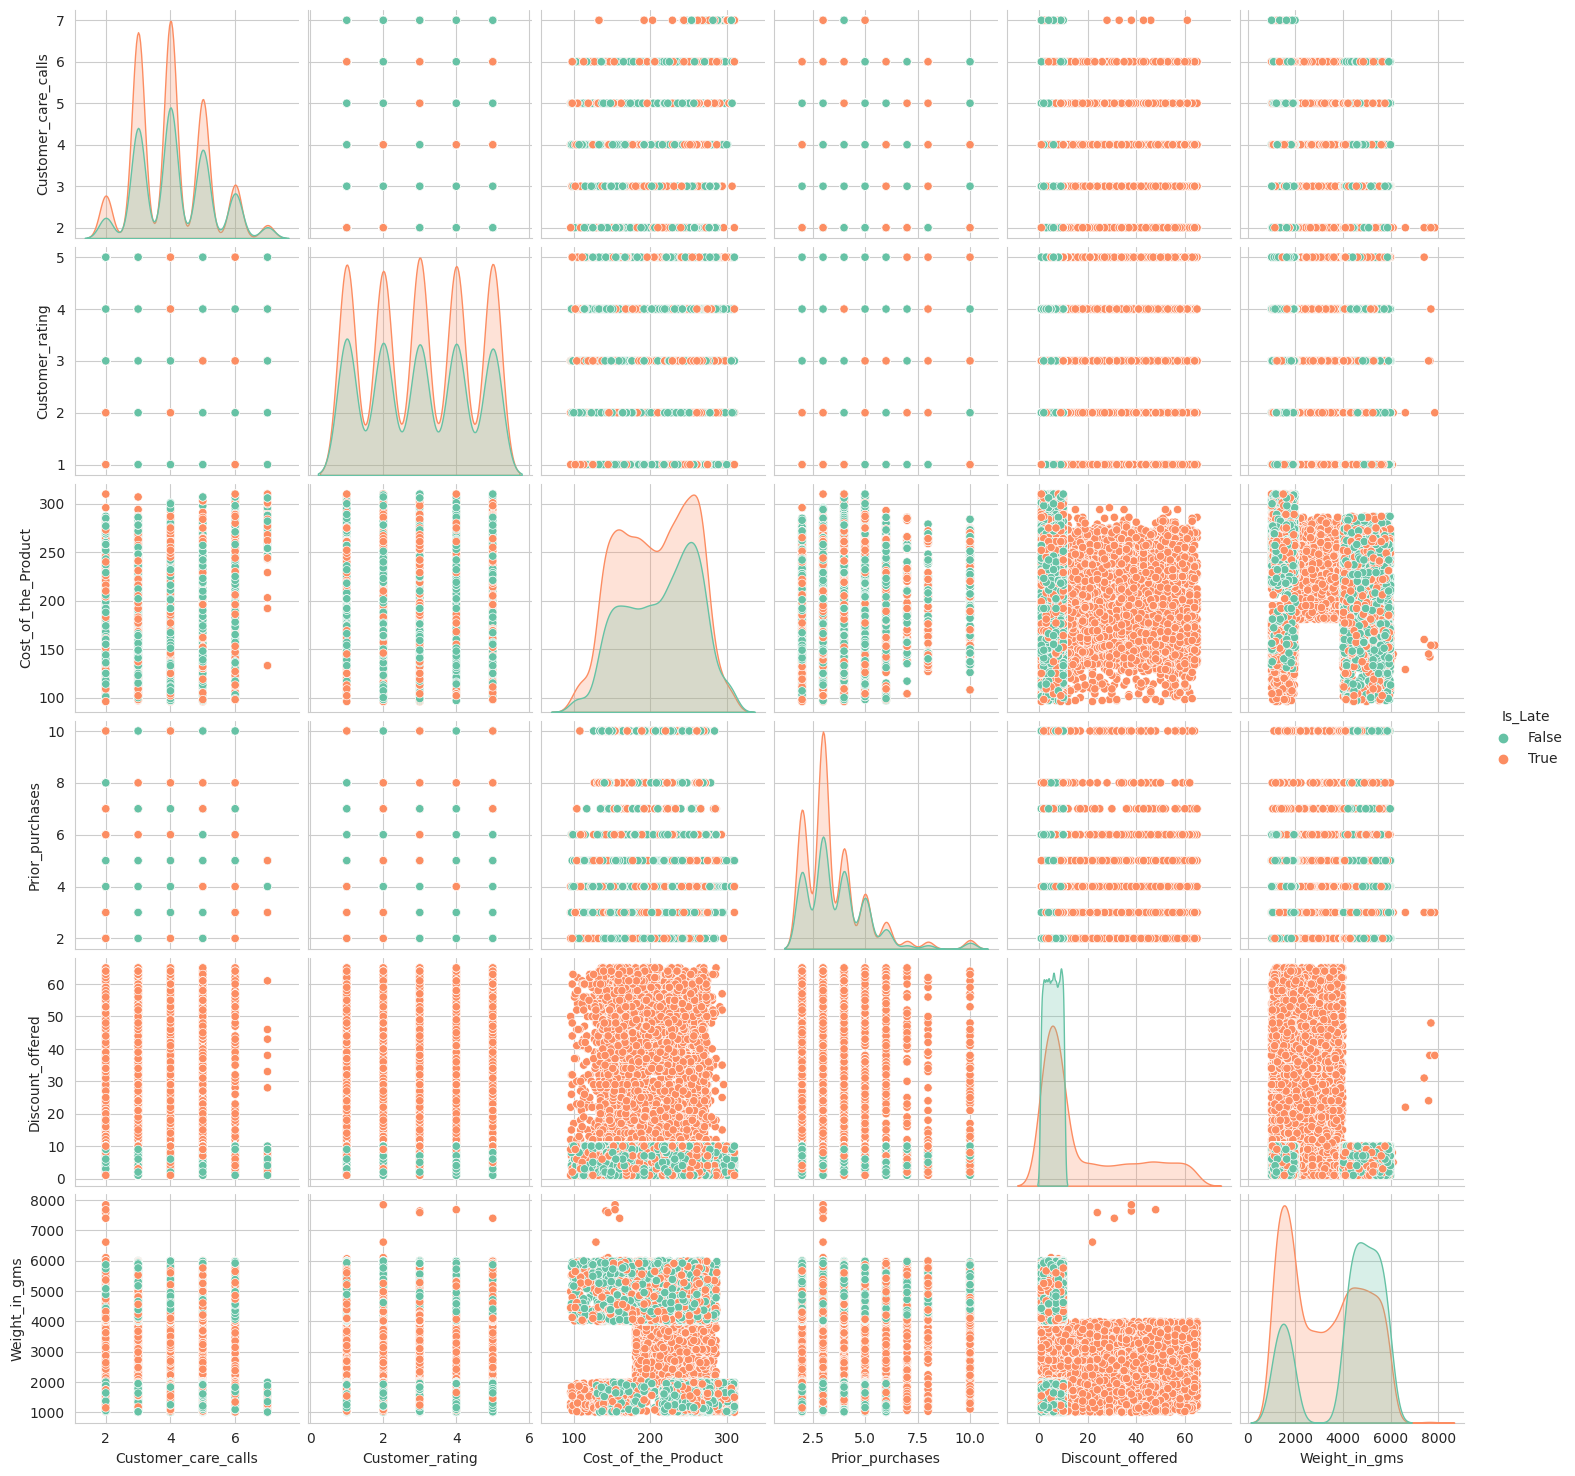

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[number], diag_kind='kde', hue='Is_Late')
plt.show()

Terdapat pola pada column Discount_offered yang mana sekitar jumlah diskon lebih dari 15% berpeluang untuk produk Is_Late.
Terdapat pola pada column Weight_in_gms dimana persebaran barang yang Is_Late mayoritas terdapat pada jumlah berat 2000 - 4000 gram.

## **4. Business Insight**

Business Insight yang diambil dikaitkan dengan target variablenya (bisnis metrics) yaitu colomn Is_Late

## a. Discount Offered

### - Target

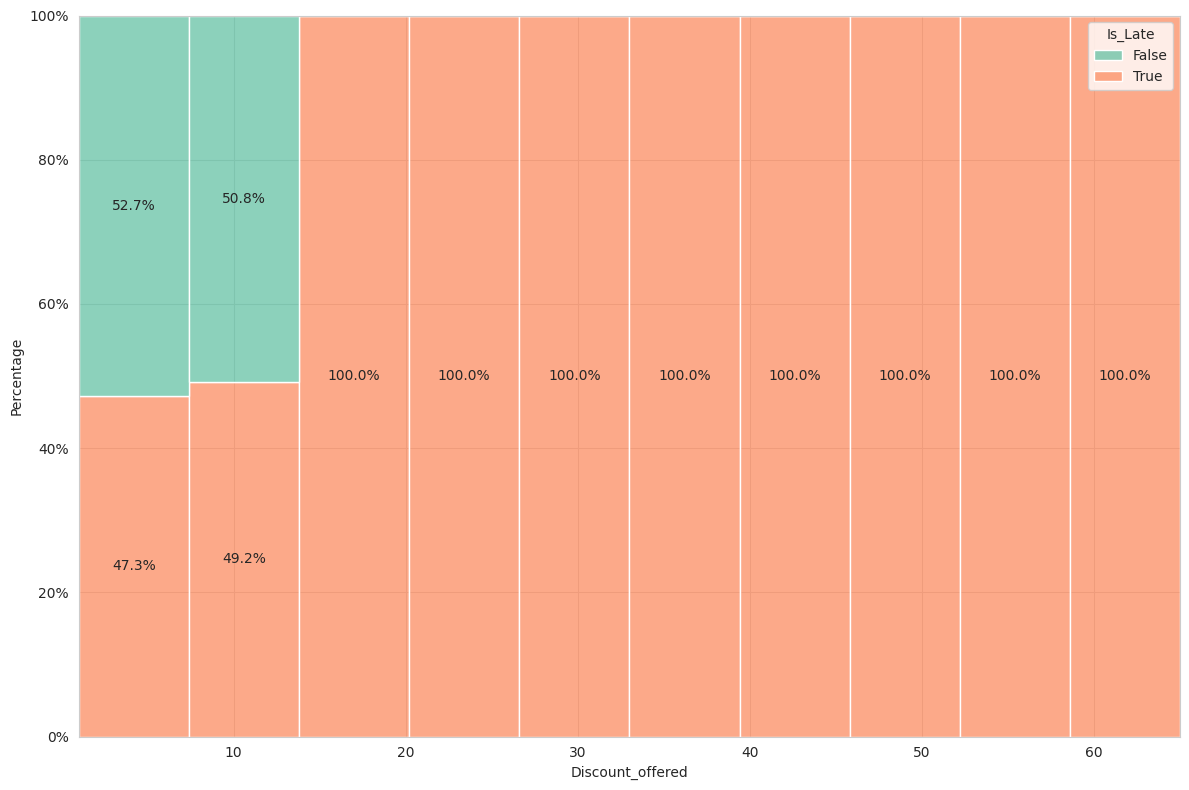

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Discount_offered', hue='Is_Late',bins=10, multiple='fill')
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_ylabel('Percentage')
plt.tight_layout()
plt.show()

Berdasarkan persebaran data pada grafik terlihat bahwa penawaran diskon diatas 15%, 100% merupakan barang yang Late. Sedangkan untuk penawaran diskonnya dibawah 15% terdapat barang yang dikirim ontime meskipun masih banyak orderan yang Late diatas 50%.


### - Weight_in_gms

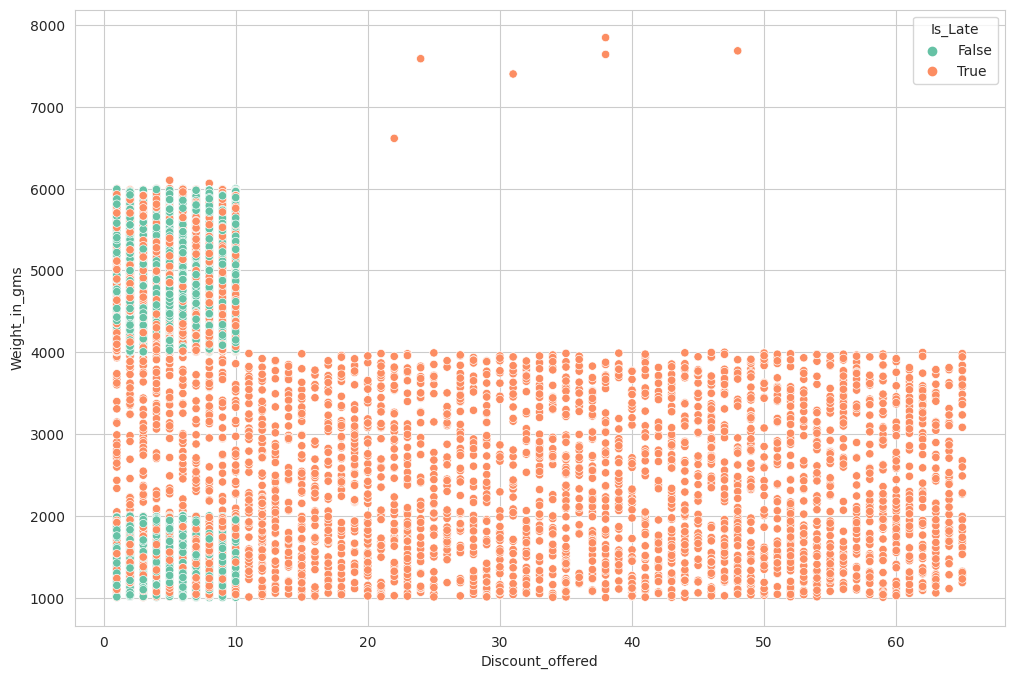

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Discount_offered', y='Weight_in_gms', hue='Is_Late')
plt.show()

Berdasarkan grafik terlihat bahwa semua barang yang memiliki berat 2000-4000 gram dan memiliki diskon diatas 10%, semuanya merupakan barang yang terlambat. Dan juga dengan berat 2000-4000 gram memiliki diskon dibawah 10%, semuanya juga merupakan barang yang terlambat.


## b. Weight_in_gms

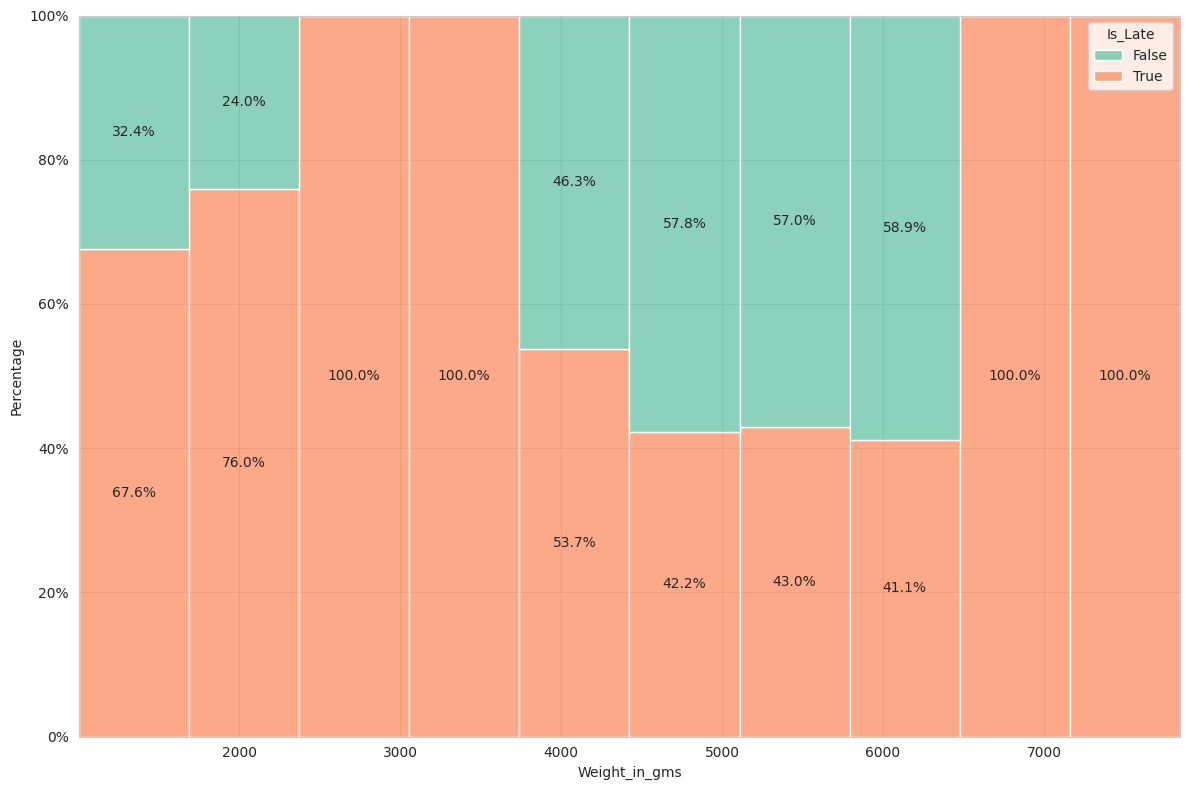

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Weight_in_gms', hue='Is_Late',bins=10, multiple='fill')
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_ylabel('Percentage')
plt.tight_layout()
plt.show()

Berdasarkan persebaran data pada grafik diatas terlihat bahwa berat sekitaran 2500-3500 dan diatas 6000 gram, 100% dari orderannya merupakan barang yang Late. Sedangkan untuk barang yang memiliki berat 0-2500 dan 3500-6500 gram masih terdapat barang yang ontime meskipun masih terdapat barang yang late diatas 20%.


## c. Warehouse_block

In [ ]:
df_Warehouse_block = df.groupby(['Warehouse_block', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_Warehouse_block = df_Warehouse_block.groupby('Warehouse_block').agg({'ID':'sum'}).reset_index()
df_Warehouse_block = pd.merge(df_Warehouse_block, df_total_Warehouse_block, on='Warehouse_block')
df_Warehouse_block.columns = ['Warehouse_block', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Warehouse_block['Percentage'] = df_Warehouse_block.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)
df_Warehouse_block

,Warehouse_block,Is_Late,Number_of_Order,Number_of_Order_by_Category,Percentage
0,A,False,758,1833,41.352973
1,A,True,1075,1833,58.647027
2,B,False,729,1833,39.770867
3,B,True,1104,1833,60.229133
4,C,False,739,1833,40.316421
5,C,True,1094,1833,59.683579
6,D,False,738,1834,40.239913
7,D,True,1096,1834,59.760087
8,F,False,1472,3666,40.152755
9,F,True,2194,3666,59.847245


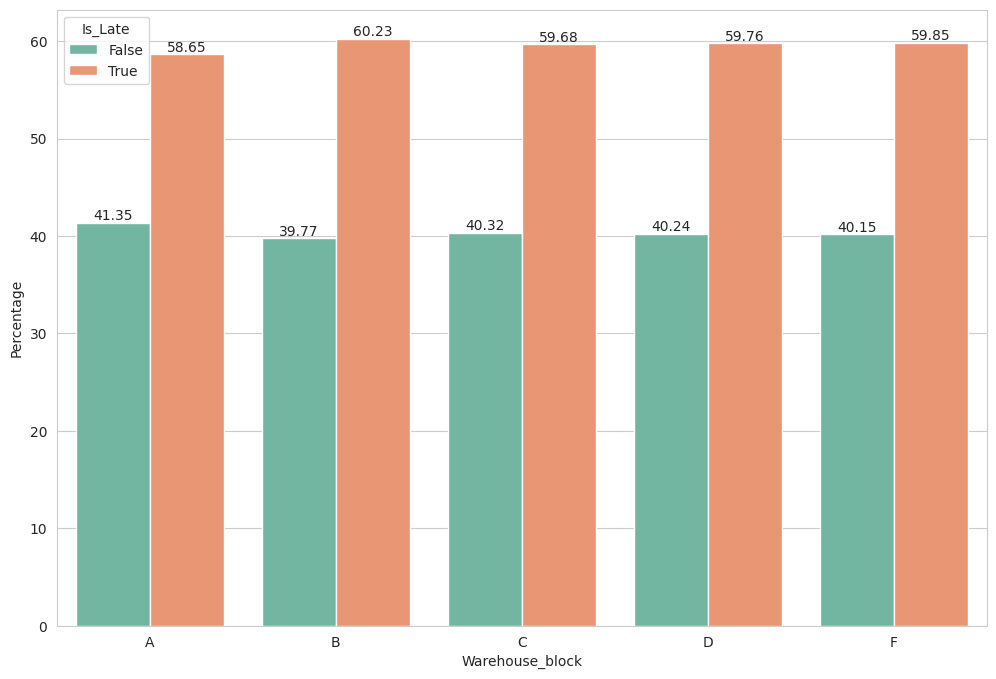

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=df_Warehouse_block, x="Warehouse_block", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

Berdasarkan grafik diatas tidak terdapat perbedaan yang signifikan perbedaan barang yang tepat waktu ataupun yang tidak tepat waktu berdasarkan Warehouse_block. Berdasarkan grafik persentase produk yang terlambat paling tinggi yaitu Warehouse_block B diikuti oleh F, D, C, dan terakhir A.

## d. Mode_of_Shipment

In [ ]:
df_Mode_of_Shipment = df.groupby(['Mode_of_Shipment', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total = df_Mode_of_Shipment.groupby('Mode_of_Shipment').agg({'ID':'sum'}).reset_index()
df_Mode_of_Shipment = pd.merge(df_Mode_of_Shipment, df_total, on='Mode_of_Shipment')
df_Mode_of_Shipment.columns = ['Mode_of_Shipment', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Mode_of_Shipment['Percentage'] = df_Mode_of_Shipment.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)
df_Mode_of_Shipment

,Mode_of_Shipment,Is_Late,Number_of_Order,Number_of_Order_by_Category,Percentage
0,Flight,False,708,1777,39.842431
1,Flight,True,1069,1777,60.157569
2,Road,False,725,1760,41.193182
3,Road,True,1035,1760,58.806818
4,Ship,False,3003,7462,40.243902
5,Ship,True,4459,7462,59.756098


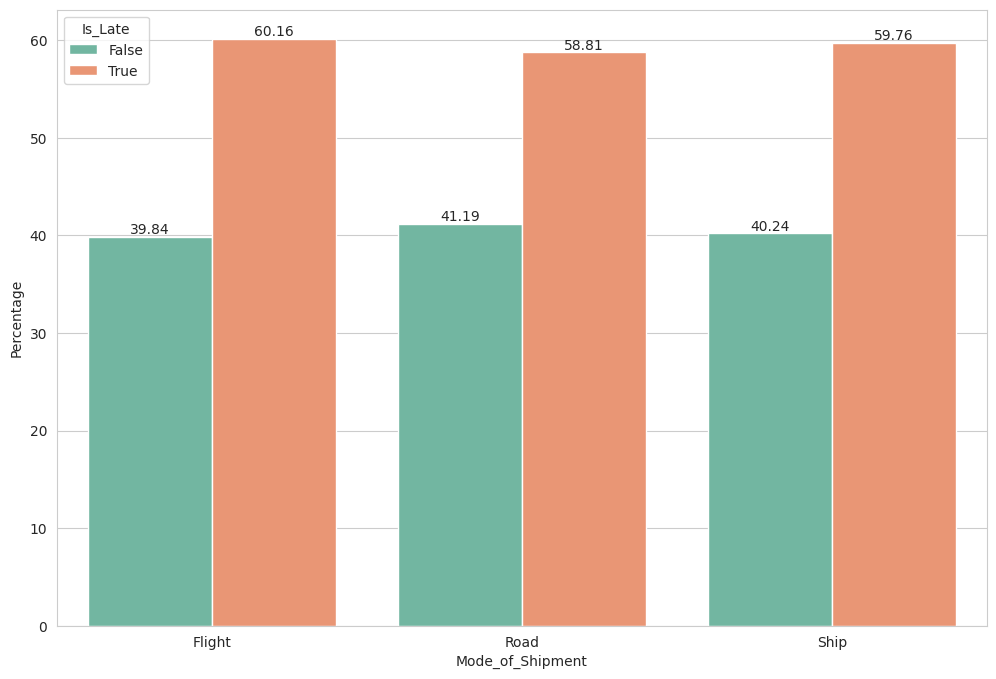

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=df_Mode_of_Shipment, x="Mode_of_Shipment", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

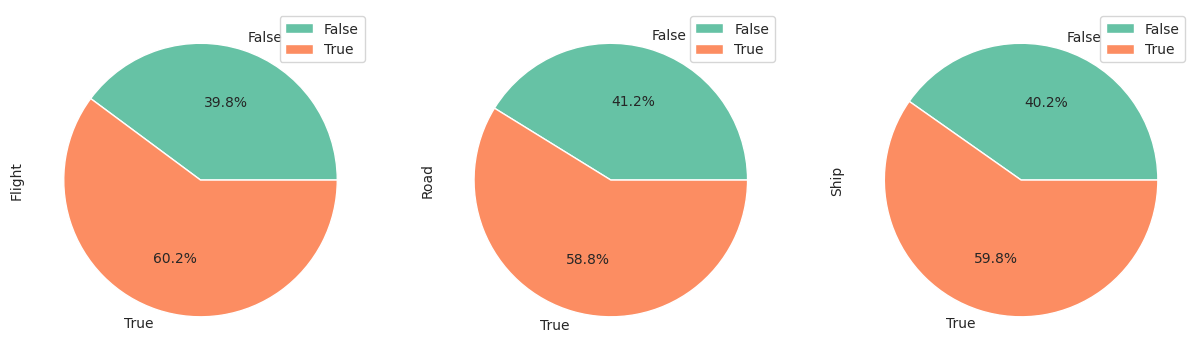

In [ ]:
df_2 = df.groupby(['Mode_of_Shipment', 'Is_Late']).agg({'ID':'nunique'})
df_2.reset_index().head()

dfp_1 = df_2.pivot_table(index = 'Mode_of_Shipment', columns = ['Is_Late'], values = 'ID')

dfp_1.T.plot.pie(subplots = True, autopct= '%.1f%%', colors = colorArr[:2], figsize=(15,5))
plt.show()

Berdasarkan pie plot di atas, dapat disimpulkan bahwa:
- Barang dengan mode shipment Flight memiliki persentase keterlambatan tertinggi dibandingkan mode shipment lainnya.
- Barang dengan mode shipment Road memiliki persentase keterlambatan terkecil dibandingkan kedua mode shipment lainnya.
- Namun Baik barang dengan mode of shipment ship, road, dan flight tetap mengalami persentase keterlambatan yang relatif besar.



## e. Product_importance

In [ ]:
df_Product_importance = df.groupby(['Product_importance', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_importance = df_Product_importance.groupby('Product_importance').agg({'ID':'sum'}).reset_index()
df_Product_importance = pd.merge(df_Product_importance, df_total_importance, on='Product_importance')
df_Product_importance.columns = ['Product_importance', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Product_importance['Percentage'] = df_Product_importance.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)
df_Product_importance

,Product_importance,Is_Late,Number_of_Order,Number_of_Order_by_Category,Percentage
0,high,False,332,948,35.021097
1,high,True,616,948,64.978903
2,low,False,2157,5297,40.721163
3,low,True,3140,5297,59.278837
4,medium,False,1947,4754,40.954985
5,medium,True,2807,4754,59.045015


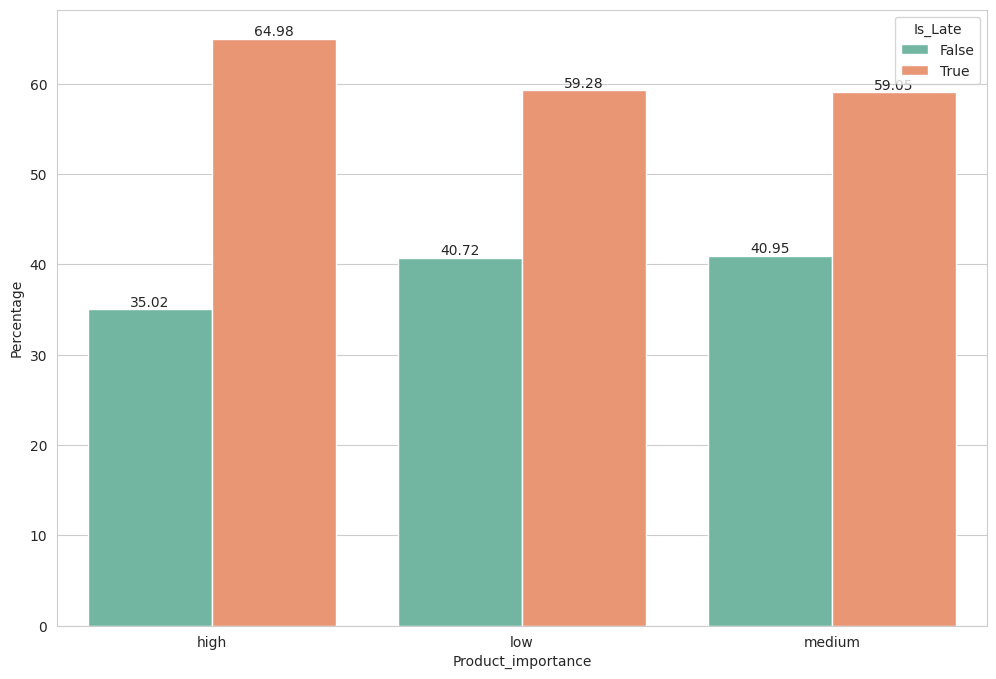

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=df_Product_importance, x="Product_importance", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

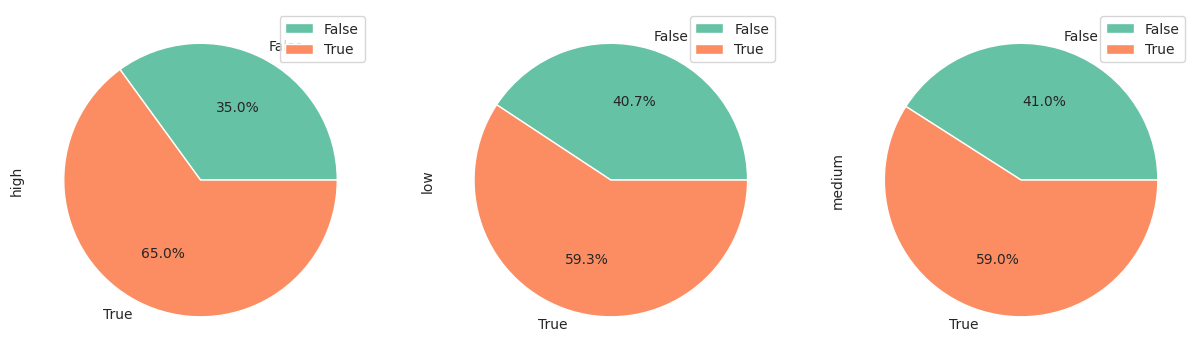

In [ ]:
df_18 = df.groupby(['Product_importance', 'Is_Late']).agg({'ID': 'count'}).reset_index()

dfp_5 = df_18.pivot_table(index = 'Product_importance', columns = ['Is_Late'], values = 'ID')

dfp_5.T.plot.pie(subplots = True, autopct= '%.1f%%', colors = colorArr[:2], figsize=(15,5))
plt.show()

Baik barang dengan product importance high, medium, dan low tetap mengalami keterlambatan yang relatif besar.




## f. Customer_care_calls

In [ ]:
df_Customer_care_calls = df.groupby(['Customer_care_calls', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_Customer_care_calls = df_Customer_care_calls.groupby('Customer_care_calls').agg({'ID':'sum'}).reset_index()
df_Customer_care_calls = pd.merge(df_Customer_care_calls, df_total_Customer_care_calls, on='Customer_care_calls')
df_Customer_care_calls.columns = ['Customer_care_calls', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Customer_care_calls['Percentage'] = df_Customer_care_calls.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)
df_Customer_care_calls

,Customer_care_calls,Is_Late,Number_of_Order,Number_of_Order_by_Category,Percentage
0,2,False,222,638,34.796238
1,2,True,416,638,65.203762
2,3,False,1206,3217,37.488343
3,3,True,2011,3217,62.511657
4,4,False,1431,3557,40.230531
5,4,True,2126,3557,59.769469
6,5,False,968,2328,41.580756
7,5,True,1360,2328,58.419244
8,6,False,490,1013,48.371175
9,6,True,523,1013,51.628825


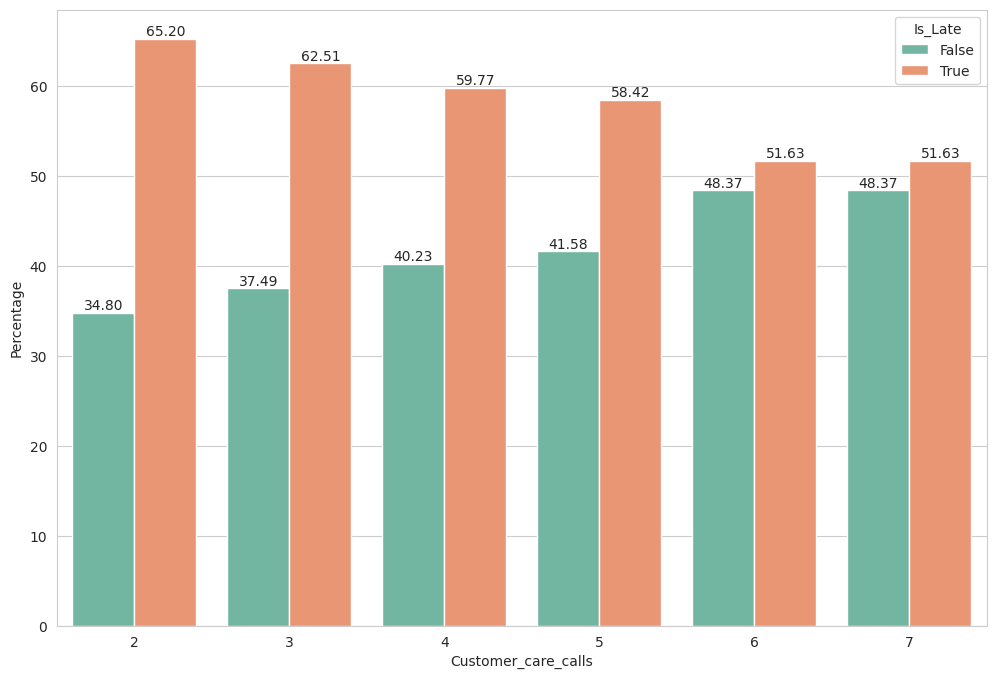

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_Customer_care_calls, x="Customer_care_calls", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

Jika dilihat dari grafik diatas semakin tinggi jumlah Customer_care_calls justru tidak merepresentasikan barang tersebut Late, yang terjadi justru sebaliknya. Hal ini mengidentifikasikan bahwa barang yang dikirim secara ontime tidak akan mengurangi Customer_care_calls.


## g. Customer_rating

In [ ]:
df_Customer_rating = df.groupby(['Customer_rating', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_rating = df_Customer_rating.groupby('Customer_rating').agg({'ID':'sum'}).reset_index()
df_Customer_rating = pd.merge(df_Customer_rating, df_total_rating, on='Customer_rating')
df_Customer_rating.columns = ['Customer_rating', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Customer_rating['Percentage'] = df_Customer_rating.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)
df_Customer_rating

,Customer_rating,Is_Late,Number_of_Order,Number_of_Order_by_Category,Percentage
0,1,False,922,2235,41.252796
1,1,True,1313,2235,58.747204
2,2,False,892,2165,41.200924
3,2,True,1273,2165,58.799076
4,3,False,882,2239,39.392586
5,3,True,1357,2239,60.607414
6,4,False,886,2189,40.475103
7,4,True,1303,2189,59.524897
8,5,False,854,2171,39.336711
9,5,True,1317,2171,60.663289


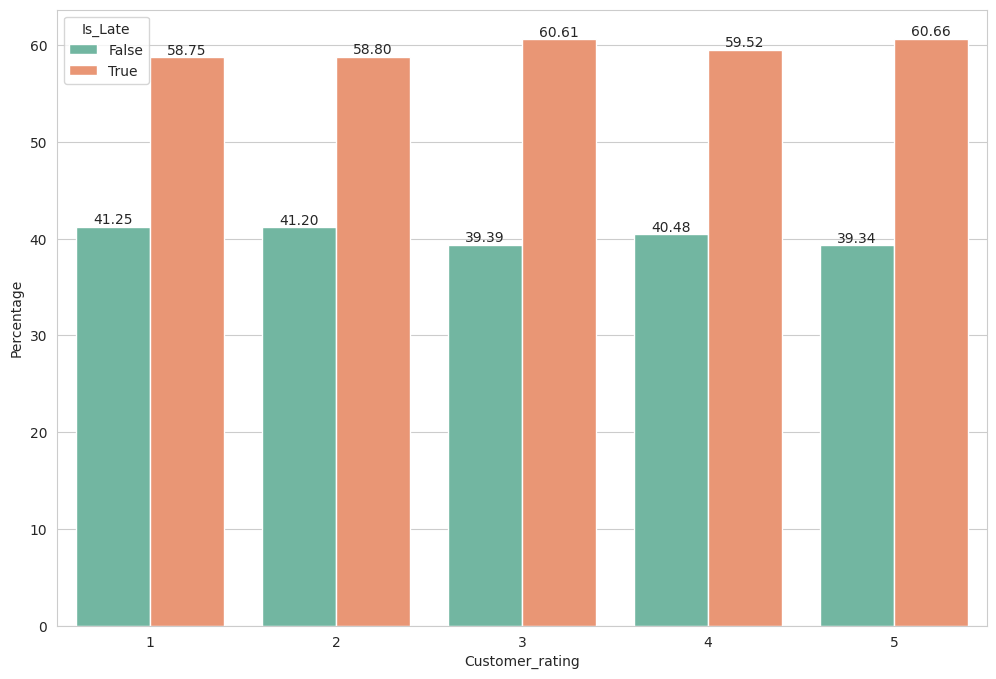

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_Customer_rating, x="Customer_rating", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

Keterlambatan barang tidak merepresentasikan barang diberi rating rendah ataupun sebaliknya

## h. Cost_of_the_Product

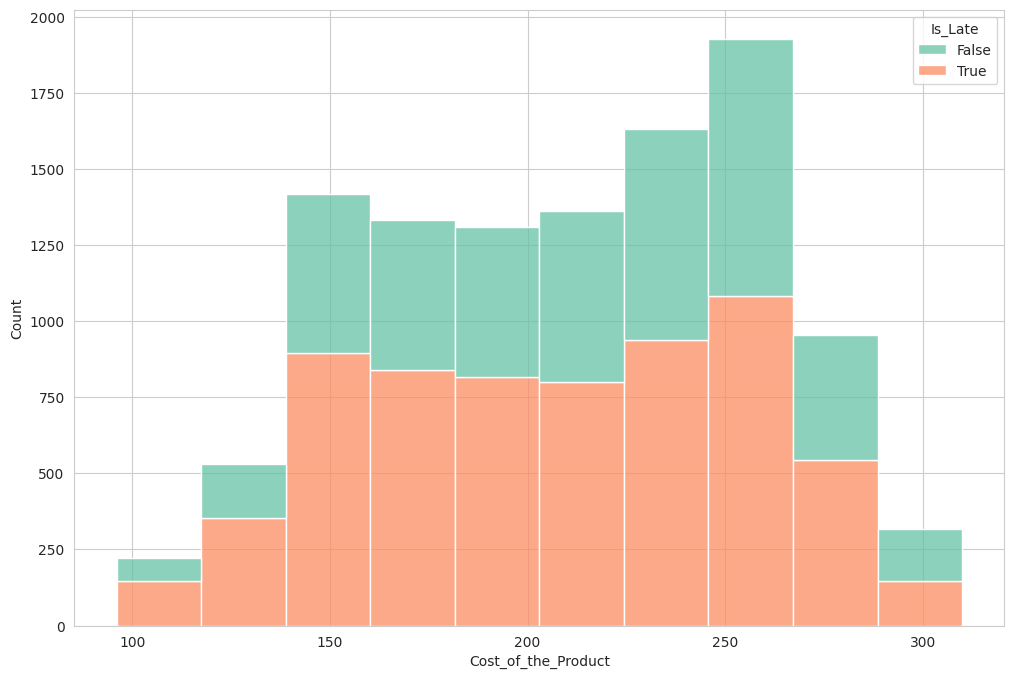

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Cost_of_the_Product', hue='Is_Late',bins=10, multiple='stack')
plt.show()

Berdasarkan grafik diatas produk mahal atau murah tidak menyebabkan barang tersebut terlambat atau tidak.

## i. Prior_purchases

In [ ]:
df_Prior_purchases = df.groupby(['Prior_purchases', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_Prior_purchases = df_Prior_purchases.groupby('Prior_purchases').agg({'ID':'sum'}).reset_index()
df_Prior_purchases = pd.merge(df_Prior_purchases, df_total_Prior_purchases, on='Prior_purchases')
df_Prior_purchases.columns = ['Prior_purchases', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Prior_purchases['Percentage'] = df_Prior_purchases.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)
df_Prior_purchases

,Prior_purchases,Is_Late,Number_of_Order,Number_of_Order_by_Category,Percentage
0,2,False,974,2599,37.475952
1,2,True,1625,2599,62.524048
2,3,False,1421,3955,35.929204
3,3,True,2534,3955,64.070796
4,4,False,984,2155,45.661253
5,4,True,1171,2155,54.338747
6,5,False,645,1287,50.116550
7,5,True,642,1287,49.883450
8,6,False,247,561,44.028520
9,6,True,314,561,55.971480


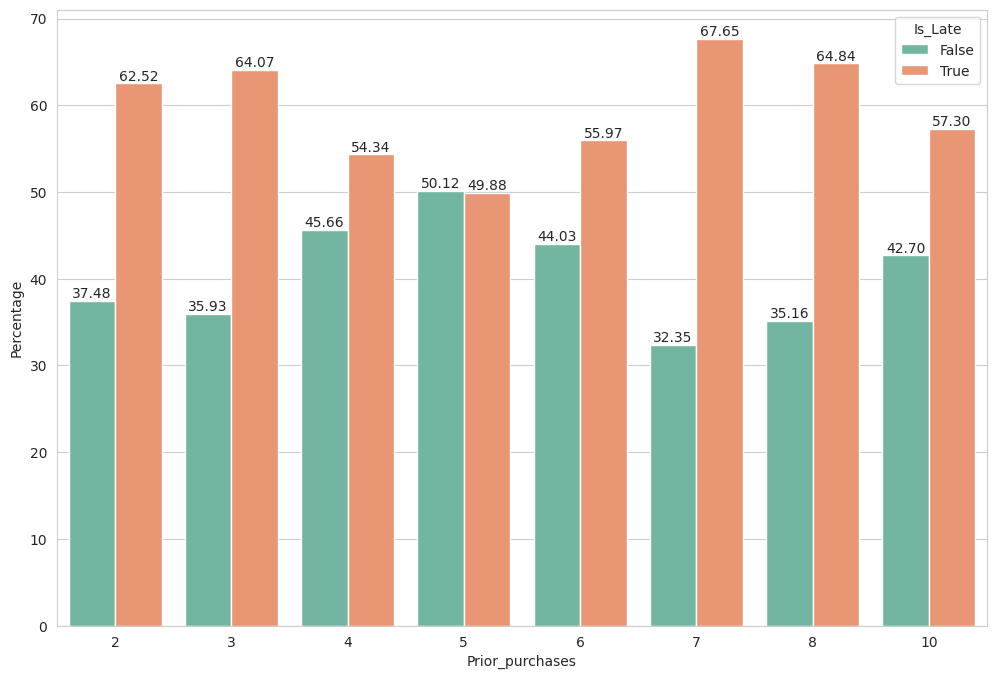

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_Prior_purchases, x="Prior_purchases", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

Berdasarkan grafik diatas pada semua Prior_purchases semuanya memiliki terdapat orderan yang tidak ontime lebih banyak dibanding yang ontime, kecuali pada Prior_purchases 5 dimana orderan yang ontime ada sedikit lebih banyak dibandingkan yang tidak ontime.

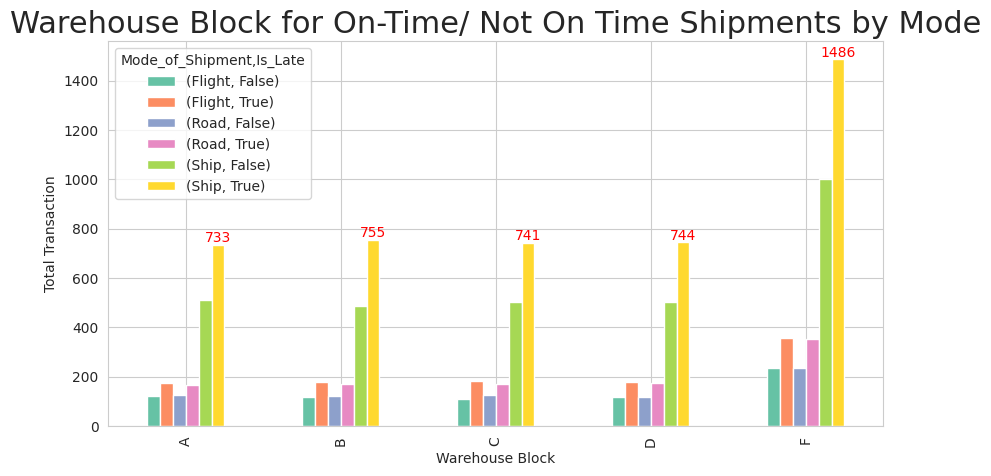

In [ ]:
df_3 = df.groupby(['Warehouse_block', 'Mode_of_Shipment', 'Is_Late']).agg({'ID':'nunique'})
df_3.reset_index().head()
dfp = df_3.pivot_table(index = 'Warehouse_block', columns = ['Mode_of_Shipment', 'Is_Late'], values = 'ID')
ax = dfp.plot(kind = 'bar', stacked = False, figsize = (10, 5))
ax.bar_label(ax.containers[-1],fontsize=10, color = 'red')
plt.title('Warehouse Block for On-Time/ Not On Time Shipments by Mode', fontsize=22)
plt.xlabel('Warehouse Block')
plt.ylabel('Total Transaction')
plt.show()

Berdasarkan bar plot berikut, dapat disimpulkan:
- Baik di warehouse block A, B, C, D, F lebih banyak barang mengalami keterlambatan pengiriman daripada barang datang tepat waktu
- Pada setiap warehouse, barang mode pengiriman dengan Ship memiliki jumlah barang datang tidak tepat waktu dan datang tepat waktu tertinggi dibandingkan mode lainnya.



# **Business Recommendation**

- Mengevaluasi kembali model perhitungan estimasi produk sampai (jika diperlukan buat kembali model yang lebih akurat).
- Meminimalisir keterlambatan pengiriman dengan mengevaluasi metode pengiriman (terutama pada mode shipment Flight) dan mempercepat proses packing.
- Mengevaluasi kembali berdasarkan pemberian diskon yang ditawarkan, terutama pada dua kategori yaitu pemberian diskon antara 0-10 dan lebih dari 10. Apa yang membedakan produk antara dua kategori tersebut. Mengapa barang yang memiliki banyak diskon semuanya tidak ontime.
- Mengevaluasi kembali berdasarkan beratnya, terdapat 3 kategori yang perlu difokuskan pada kategori ini yaitu 0-2000, 4000-6000, dan sisanya. Mengapa pada berat selain 0-2000 dan 4000-6000 tidak terdapat produk yang on-time.



---